In [26]:
#adjust screenwidth:
# from IPython.core.display import HTML
from IPython.display import display, HTML

HTML("<style>.container { width:98% !important; }</style>")

In [1]:
%load_ext autoreload
# set project dir as base dir. always works!
project = 'economy'

import os.path
import sys
current_dir = os.path.abspath('./')
project_dir = current_dir[:current_dir.rfind(project)+len(project)]
sys.path.insert(0, project_dir)

import src as epd

In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as pdr
import pandasdmx as ps
import widukind_sdmx as wd

import matplotlib.pyplot as plt

# pandas datareader

In [1]:
import geopandas as gpd

ImportError: libicui18n.so.58: cannot open shared object file: No such file or directory

In [66]:
# world bank reader
from pandas_datareader import wb

countries = wb.get_countries()
indicators = wb.get_indicators()

In [ ]:
countries

In [ ]:
indicators[indicators.source=='World Development Indicators']

In [ ]:
indicators['source'].value_counts()

### define functions

In [208]:
def make_bins(series, num_bins=2, bins=None, labels=None):
    minval = series.min()
    maxval = series.max()+1 # just to be sure it's also included
    if bins != None:
        bins = np.array(bins)
        bins = np.sort(np.append(bins[(bins>=minval) & (bins<=maxval)],[minval,maxval]))
    else:
        bins = np.linspace(minval,maxval,num_bins+1)
    binned = pd.cut(series,bins,include_lowest=True, labels=labels)
    return binned


In [212]:
epd.EconDataFrame(edf)

TypeError: __init__() takes 1 positional argument but 2 were given

In [211]:
cols = ['gdp per capita, ppp (current', 'air pollution, mean annual']

ind = search_import(cols, exact=True, verbose=False)
edf = import_edf(ind, ['united states', 'china'], [1900,2020])

In [15]:
def inspect_df(df, bins=None):
    if not bins:
        bins = list(df.mean())
    print('count:\n{}'.format(df.count()))
    df.plot('x','y','scatter')
    df.hist()
    plt.show()
    print(df.head())
    
    df['x_bins'] = make_bins(df.x, bins=bins[0])
    df['y_bins'] = make_bins(df.y, bins=bins[1])
    
    
    cross = pd.crosstab(df.x_bins.iloc[:],df.y_bins.iloc[:])
    print(cross)
    
    return df.describe()
#     for n in range(20,len(gdp_agr),5):

#         cross = pd.crosstab(df.x_bins.iloc[:n],df.y_bins.iloc[:n])

#         k = min(cross.shape)

#         chi2, p_val_chi2, dof, expected = stats.chi2_contingency(cross)
#         C_korr = np.sqrt( k/(k-1.) * chi2/(n+chi2) ) 

#         odds_ratio, p_val_fisher = stats.fisher_exact(cross)

#         df = df.append(dict(zip(list(df.columns),[n,C_korr,odds_ratio,p_val_chi2,p_val_fisher])), ignore_index=True)

#     df.iloc[:,[0,3,4]].plot(x='n')
#     plt.show()
#     df.iloc[:,[0,1,2]].plot(x='n')

In [16]:
bins = [10000,20]
inspect_df(df, bins=bins)

count:
NY.GDP.PCAP.PP.KD    5975
dtype: int64


KeyError: 'x'

x    228
y    228
dtype: int64
                                                x          y
country                        year                         
Arab World                     2000  11372.059728  48.480219
Caribbean small states         2000  11127.024751  19.859293
Central Europe and the Baltics 2000  14409.434475  22.860499
Early-demographic dividend     2000   5071.309505  47.742835
East Asia & Pacific            2000   7178.939405  39.037780


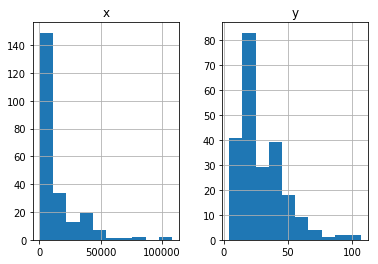

In [19]:
year=2000

# search DB
wb.search('gdp.*cap')
# print(wb.search('pol'))

x_str = 'NY.GDP.PCAP.PP.KD'

x = wb.download(country='all',indicator=x_str, start=year, end=year)

wb.search('agr')

y_str = 'TX.VAL.TECH.MF.ZS'
y_str = 'EN.ATM.PM25.MC.M3'

y = wb.download(country='all',indicator=y_str, start=year, end=year)

df = x.join(y).dropna().rename(columns={x_str:'x', y_str:'y'})
print(df.count())
print(df.head())
df.hist()
plt.show()

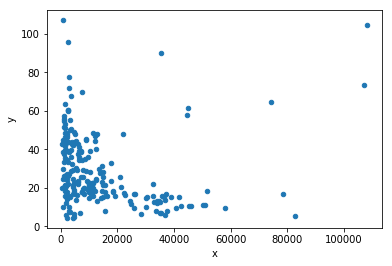

In [26]:
df.plot('x','y','scatter')
plt.show()

In [92]:
gdp_agr['gdp_bins'] = make_bins(gdp_agr.gdp, bins=[10000])
gdp_agr['agr_bins'] = make_bins(gdp_agr.agr,bins=[20])

df = pd.DataFrame(columns=['n','C_korr','odds_ratio','p_val_chi2','p_val_fisher'])

for n in range(20,len(gdp_agr),5):

    cross = pd.crosstab(gdp_agr.gdp_bins.iloc[:n],gdp_agr.agr_bins.iloc[:n])

    k = min(cross.shape)

    chi2, p_val_chi2, dof, expected = stats.chi2_contingency(cross)
    C_korr = np.sqrt( k/(k-1.) * chi2/(n+chi2) ) 

    odds_ratio, p_val_fisher = stats.fisher_exact(cross)

    df = df.append(dict(zip(list(df.columns),[n,C_korr,odds_ratio,p_val_chi2,p_val_fisher])), ignore_index=True)

df.iloc[:,[0,3,4]].plot(x='n')
plt.show()
df.iloc[:,[0,1,2]].plot(x='n')
plt.show()
df

AttributeError: 'DataFrame' object has no attribute 'gdp'

In [11]:
n=20
pd.crosstab(gdp_agr.gdp_bins.iloc[:n],gdp_agr.agr_bins.iloc[:n])

AttributeError: 'DataFrame' object has no attribute 'gdp_bins'

In [208]:
stats.chisquare(gdp_agr.gdp_bins,gdp_agr.agr_bins)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [221]:
chi2, p_val, dof, expected = stats.chi2_contingency(cross)
print(chi2,p_val)
stats.fisher_exact(cross)

24.6195450243 6.98397829574e-07


(4.7629399585921322, 4.542195349628268e-07)

# widukind

In [19]:
# Widukind Agencies: ECB, INSEE, EUROSTAT, BIS, IMF, OECD, ESRI, FED
sdmx = wd.Request(agency='ECB')

In [20]:
wd.Request?

In [21]:
sdmx.data()

AttributeError: 'Request' object has no attribute '_get_reader'

In [5]:
data_response = sdmx.get(resource_type='data', resource_id="IPCH-2015-FR-COICOP", key={'FREQ': 'A', 'PRODUIT': '00', 'NATURE': 'INDICE'})

AttributeError: 'Request' object has no attribute '_get_reader'

In [ ]:
df = data_response.write()